### Importaci√≥n de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar datos locales
tienda1 = pd.read_csv('base-de-datos-challenge1-latam/tienda_1 .csv')
tienda2 = pd.read_csv('base-de-datos-challenge1-latam/tienda_2.csv')
tienda3 = pd.read_csv('base-de-datos-challenge1-latam/tienda_3.csv')
tienda4 = pd.read_csv('base-de-datos-challenge1-latam/tienda_4.csv')

# Combinar todos los datos en un solo DataFrame
todos_datos = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

print("Datos cargados exitosamente!")
print(f"Total de registros: {len(todos_datos)}")
print("\nPrimeras 5 filas:")
todos_datos.head()

Datos cargados exitosamente!
Total de registros: 9435

Primeras 5 filas:


Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



In [2]:
# 1. An√°lisis de facturaci√≥n

# Explorar la estructura de los datos
print("Informaci√≥n general del dataset:")
print(todos_datos.info())
print("\nColumnas disponibles:")
print(todos_datos.columns.tolist())
print("\nPrimeras 5 filas:")
todos_datos.head()

Informaci√≥n general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categor√≠a del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de env√≠o          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificaci√≥n            9435 non-null   int64  
 8   M√©todo de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 884.7+ KB
None

Columnas disponibles:
['Producto', 'Categor

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

In [3]:
# An√°lisis de facturaci√≥n
print("=== AN√ÅLISIS DE FACTURACI√ìN ===\n")

# Estad√≠sticas b√°sicas de precios
print("1. Estad√≠sticas de precios:")
print(f"   ‚Ä¢ Facturaci√≥n total: ${todos_datos['Precio'].sum():,.2f}")
print(f"   ‚Ä¢ Precio promedio: ${todos_datos['Precio'].mean():.2f}")
print(f"   ‚Ä¢ Precio mediano: ${todos_datos['Precio'].median():.2f}")
print(f"   ‚Ä¢ Precio m√≠nimo: ${todos_datos['Precio'].min():.2f}")
print(f"   ‚Ä¢ Precio m√°ximo: ${todos_datos['Precio'].max():.2f}")
print(f"   ‚Ä¢ Desviaci√≥n est√°ndar: ${todos_datos['Precio'].std():.2f}")

# An√°lisis por lugar de compra (tiendas)
print("\n2. Facturaci√≥n por tienda:")
facturacion_por_tienda = todos_datos.groupby('Lugar de Compra')['Precio'].agg(['sum', 'mean', 'count']).round(2)
facturacion_por_tienda.columns = ['Facturaci√≥n Total', 'Precio Promedio', 'N√∫mero de Ventas']
facturacion_por_tienda = facturacion_por_tienda.sort_values('Facturaci√≥n Total', ascending=False)
print(facturacion_por_tienda)

=== AN√ÅLISIS DE FACTURACI√ìN ===

1. Estad√≠sticas de precios:
   ‚Ä¢ Facturaci√≥n total: $4,403,619,200.00
   ‚Ä¢ Precio promedio: $466732.29
   ‚Ä¢ Precio mediano: $221500.00
   ‚Ä¢ Precio m√≠nimo: $7600.00
   ‚Ä¢ Precio m√°ximo: $2977000.00
   ‚Ä¢ Desviaci√≥n est√°ndar: $590320.68

2. Facturaci√≥n por tienda:
                 Facturaci√≥n Total  Precio Promedio  N√∫mero de Ventas
Lugar de Compra                                                      
Bogot√°                1.814858e+09        460273.47              3943
Medell√≠n              1.096669e+09        473927.92              2314
Cali                  5.065261e+08        503005.06              1007
Pereira               2.259273e+08        436996.71               517
Barranquilla          1.320405e+08        425937.10               310
Cartagena             1.023767e+08        423044.21               242
C√∫cuta                9.936910e+07        534242.47               186
Bucaramanga           9.057330e+07        500404.9

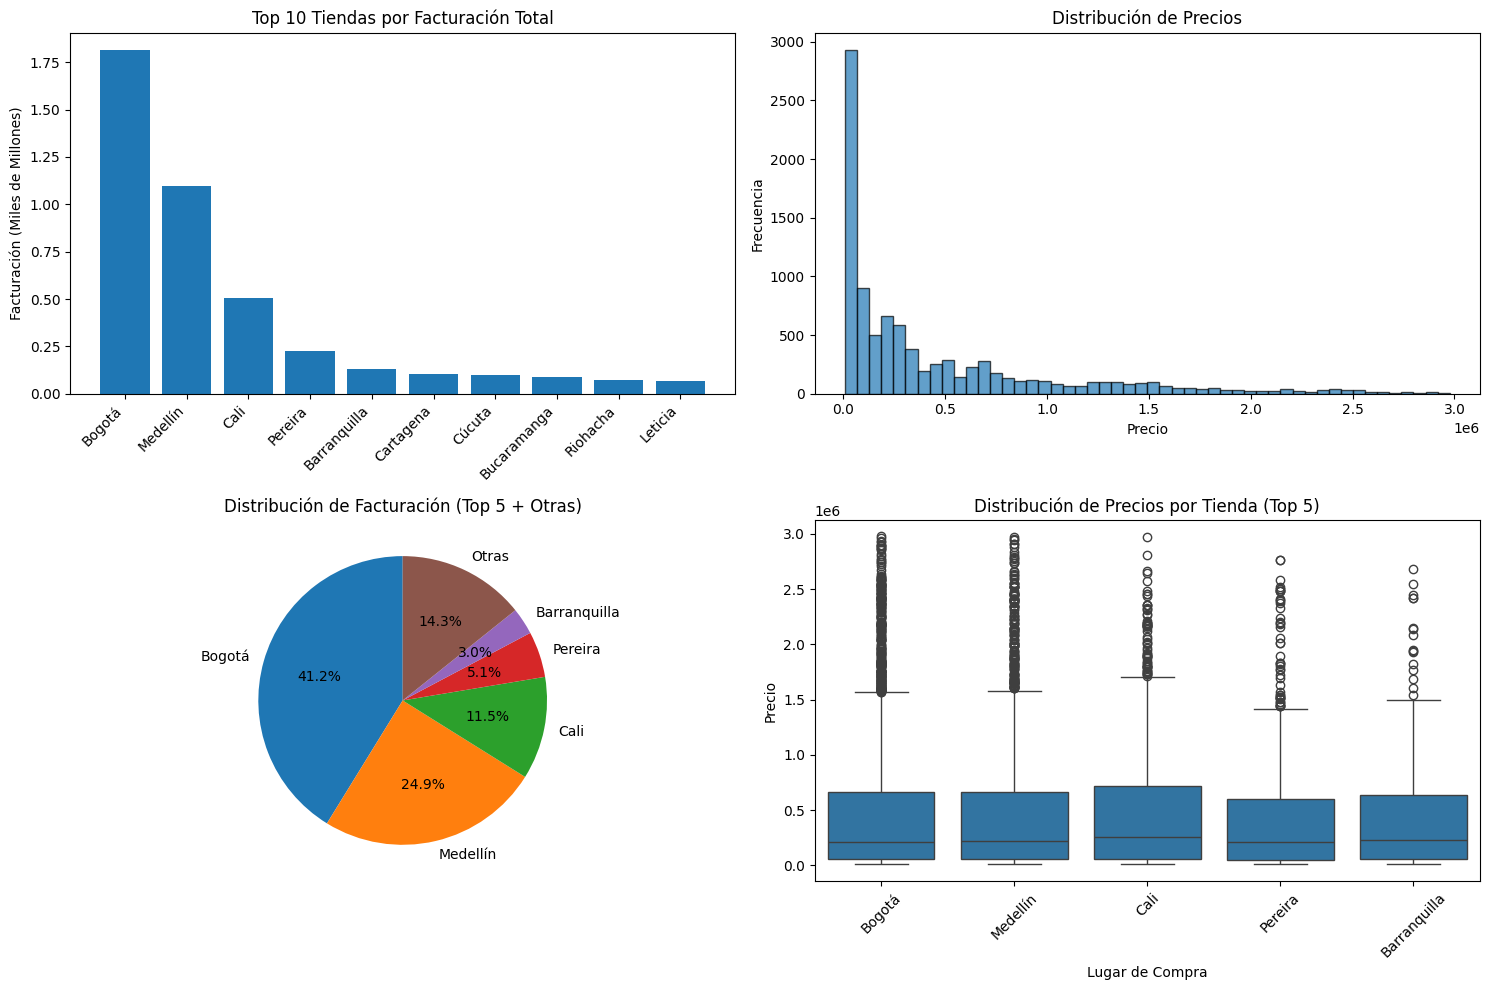

In [4]:
# Visualizaci√≥n de facturaci√≥n
plt.figure(figsize=(15, 10))

# Gr√°fico de barras de facturaci√≥n por tienda
plt.subplot(2, 2, 1)
top_10_tiendas = facturacion_por_tienda.head(10)
plt.bar(range(len(top_10_tiendas)), top_10_tiendas['Facturaci√≥n Total'] / 1e9)
plt.xticks(range(len(top_10_tiendas)), top_10_tiendas.index, rotation=45, ha='right')
plt.ylabel('Facturaci√≥n (Miles de Millones)')
plt.title('Top 10 Tiendas por Facturaci√≥n Total')
plt.tight_layout()

# Histograma de distribuci√≥n de precios
plt.subplot(2, 2, 2)
plt.hist(todos_datos['Precio'], bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n de Precios')

# Gr√°fico de pastel de facturaci√≥n por tienda (top 5)
plt.subplot(2, 2, 3)
top_5 = facturacion_por_tienda.head(5)
otros = facturacion_por_tienda.iloc[5:]['Facturaci√≥n Total'].sum()
valores = list(top_5['Facturaci√≥n Total']) + [otros]
etiquetas = list(top_5.index) + ['Otras']
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90)
plt.title('Distribuci√≥n de Facturaci√≥n (Top 5 + Otras)')

# Box plot de precios por tienda (top 5)
plt.subplot(2, 2, 4)
top_5_ciudades = facturacion_por_tienda.head(5).index
datos_top5 = todos_datos[todos_datos['Lugar de Compra'].isin(top_5_ciudades)]
sns.boxplot(data=datos_top5, x='Lugar de Compra', y='Precio')
plt.xticks(rotation=45)
plt.title('Distribuci√≥n de Precios por Tienda (Top 5)')
plt.ylabel('Precio')

plt.tight_layout()
plt.show()

# 2. Ventas por categor√≠a

In [5]:
# 2. Ventas por categor√≠a
print("=== AN√ÅLISIS DE VENTAS POR CATEGOR√çA ===\n")

# An√°lisis por categor√≠a de producto
ventas_por_categoria = todos_datos.groupby('Categor√≠a del Producto').agg({
    'Precio': ['sum', 'mean', 'count'],
    'Calificaci√≥n': 'mean'
}).round(2)

# Simplificar nombres de columnas
ventas_por_categoria.columns = ['Facturaci√≥n Total', 'Precio Promedio', 'N√∫mero de Ventas', 'Calificaci√≥n Promedio']
ventas_por_categoria = ventas_por_categoria.sort_values('Facturaci√≥n Total', ascending=False)

print("1. Ventas por categor√≠a:")
print(ventas_por_categoria)

print(f"\n2. Categor√≠as disponibles ({len(ventas_por_categoria)} total):")
for i, categoria in enumerate(ventas_por_categoria.index, 1):
    print(f"   {i}. {categoria}")

# Top 5 categor√≠as por facturaci√≥n
print(f"\n3. Top 5 categor√≠as por facturaci√≥n:")
top_5_categorias = ventas_por_categoria.head(5)
for i, (categoria, datos) in enumerate(top_5_categorias.iterrows(), 1):
    print(f"   {i}. {categoria}: ${datos['Facturaci√≥n Total']:,.0f} ({datos['N√∫mero de Ventas']} ventas)")

=== AN√ÅLISIS DE VENTAS POR CATEGOR√çA ===

1. Ventas por categor√≠a:
                         Facturaci√≥n Total  Precio Promedio  N√∫mero de Ventas  \
Categor√≠a del Producto                                                          
Electr√≥nicos                  1.660576e+09        937119.92              1772   
Electrodom√©sticos             1.324751e+09       1152960.05              1149   
Muebles                       7.576610e+08        401729.06              1886   
Instrumentos musicales        3.487726e+08        463177.42               753   
Deportes y diversi√≥n          1.429777e+08        128461.55              1113   
Juguetes                      7.360440e+07         57057.67              1290   
Art√≠culos para el hogar       5.757980e+07         78876.44               730   
Libros                        3.769610e+07         50803.37               742   

                         Calificaci√≥n Promedio  
Categor√≠a del Producto                          
Electr√≥nico

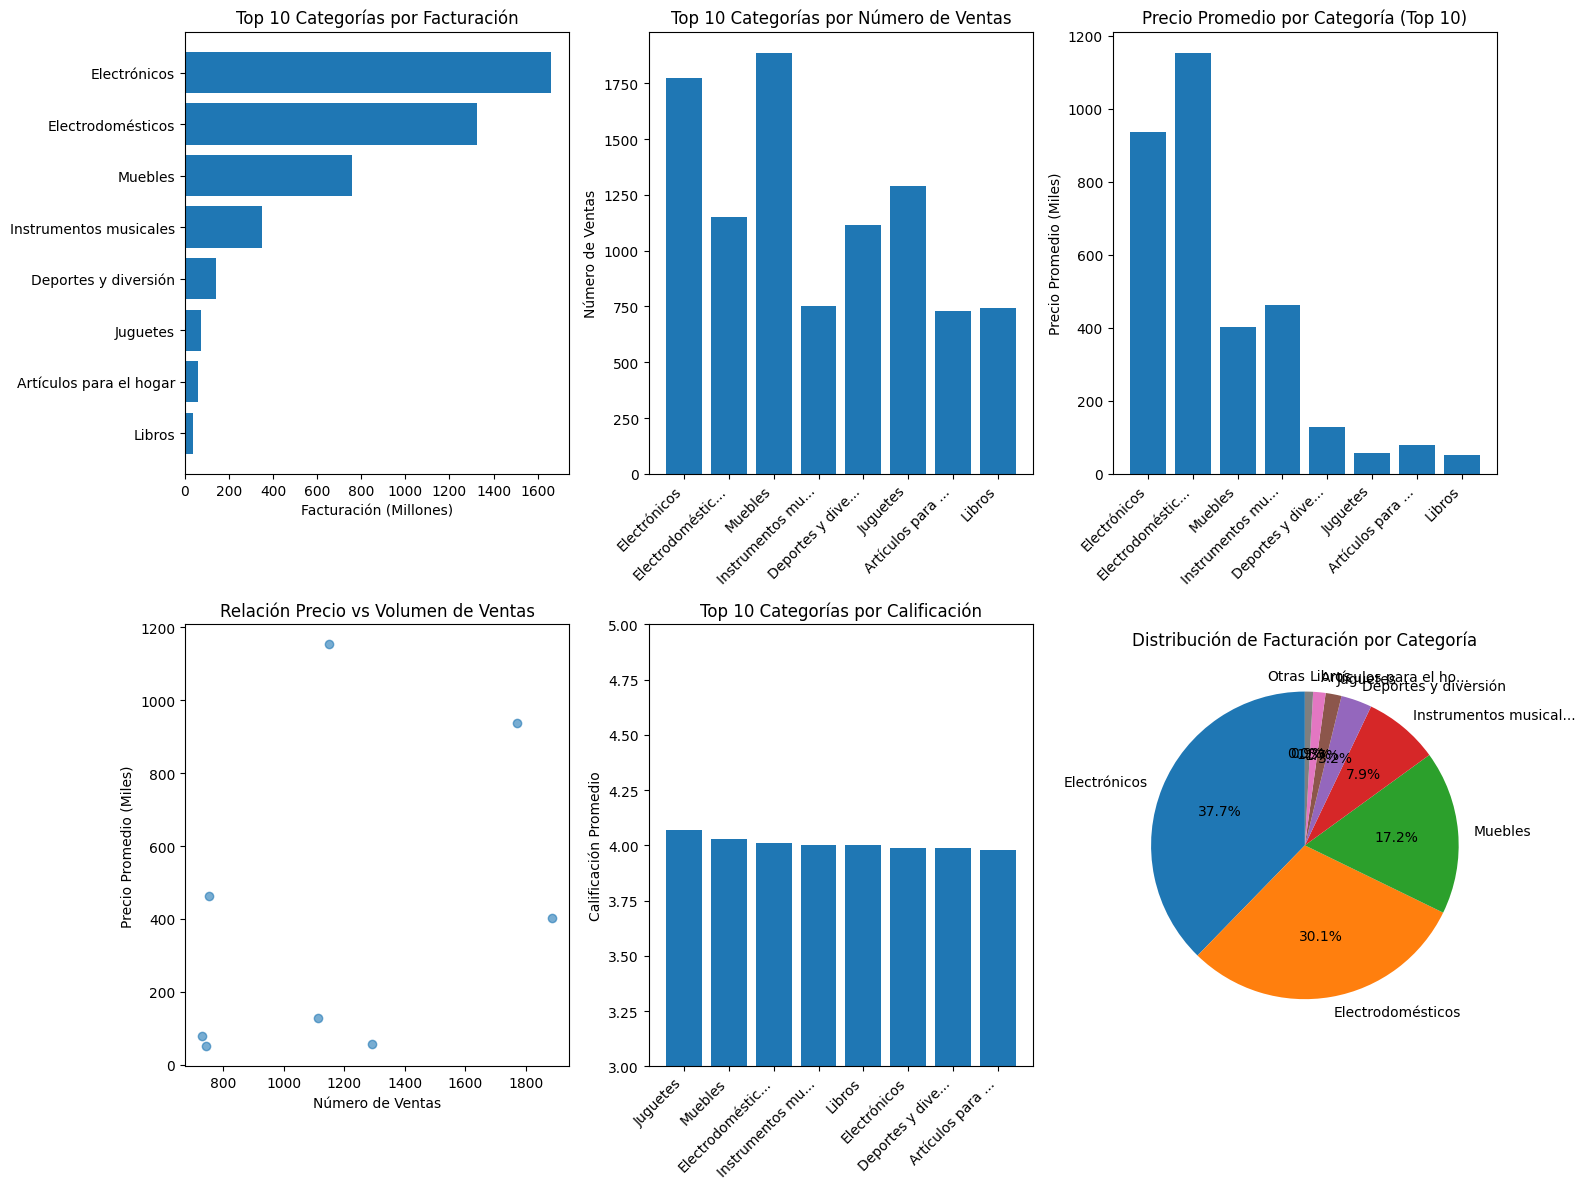

In [6]:
# Visualizaci√≥n de ventas por categor√≠a
plt.figure(figsize=(16, 12))

# Top 10 categor√≠as por facturaci√≥n
plt.subplot(2, 3, 1)
top_10_cat = ventas_por_categoria.head(10)
plt.barh(range(len(top_10_cat)), top_10_cat['Facturaci√≥n Total'] / 1e6)
plt.yticks(range(len(top_10_cat)), top_10_cat.index)
plt.xlabel('Facturaci√≥n (Millones)')
plt.title('Top 10 Categor√≠as por Facturaci√≥n')
plt.gca().invert_yaxis()

# N√∫mero de ventas por categor√≠a (top 10)
plt.subplot(2, 3, 2)
top_10_ventas = ventas_por_categoria.head(10)
plt.bar(range(len(top_10_ventas)), top_10_ventas['N√∫mero de Ventas'])
plt.xticks(range(len(top_10_ventas)), [cat[:15] + '...' if len(cat) > 15 else cat for cat in top_10_ventas.index], rotation=45, ha='right')
plt.ylabel('N√∫mero de Ventas')
plt.title('Top 10 Categor√≠as por N√∫mero de Ventas')

# Precio promedio por categor√≠a (top 10)
plt.subplot(2, 3, 3)
top_10_precio = ventas_por_categoria.head(10)
plt.bar(range(len(top_10_precio)), top_10_precio['Precio Promedio'] / 1000)
plt.xticks(range(len(top_10_precio)), [cat[:15] + '...' if len(cat) > 15 else cat for cat in top_10_precio.index], rotation=45, ha='right')
plt.ylabel('Precio Promedio (Miles)')
plt.title('Precio Promedio por Categor√≠a (Top 10)')

# Gr√°fico de dispersi√≥n: Precio vs N√∫mero de ventas
plt.subplot(2, 3, 4)
plt.scatter(ventas_por_categoria['N√∫mero de Ventas'], ventas_por_categoria['Precio Promedio'] / 1000, alpha=0.6)
plt.xlabel('N√∫mero de Ventas')
plt.ylabel('Precio Promedio (Miles)')
plt.title('Relaci√≥n Precio vs Volumen de Ventas')

# Calificaci√≥n promedio por categor√≠a (top 10)
plt.subplot(2, 3, 5)
top_10_calif = ventas_por_categoria.sort_values('Calificaci√≥n Promedio', ascending=False).head(10)
plt.bar(range(len(top_10_calif)), top_10_calif['Calificaci√≥n Promedio'])
plt.xticks(range(len(top_10_calif)), [cat[:15] + '...' if len(cat) > 15 else cat for cat in top_10_calif.index], rotation=45, ha='right')
plt.ylabel('Calificaci√≥n Promedio')
plt.title('Top 10 Categor√≠as por Calificaci√≥n')
plt.ylim(3, 5)

# Distribuci√≥n de categor√≠as (pie chart para top 8)
plt.subplot(2, 3, 6)
top_8_cat = ventas_por_categoria.head(8)
otros_cat = ventas_por_categoria.iloc[8:]['Facturaci√≥n Total'].sum()
valores = list(top_8_cat['Facturaci√≥n Total']) + [otros_cat]
etiquetas = [cat[:20] + '...' if len(cat) > 20 else cat for cat in top_8_cat.index] + ['Otras']
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90)
plt.title('Distribuci√≥n de Facturaci√≥n por Categor√≠a')

plt.tight_layout()
plt.show()

# 3. Calificaci√≥n promedio de la tienda


In [7]:
# 3. Calificaci√≥n promedio de la tienda
print("=== AN√ÅLISIS DE CALIFICACI√ìN PROMEDIO POR TIENDA ===\n")

# An√°lisis de calificaciones por tienda
calificaciones_tienda = todos_datos.groupby('Lugar de Compra').agg({
    'Calificaci√≥n': ['mean', 'std', 'count', 'min', 'max']
}).round(2)

# Simplificar nombres de columnas
calificaciones_tienda.columns = ['Calificaci√≥n Promedio', 'Desviaci√≥n Est√°ndar', 'N√∫mero de Calificaciones', 'Calificaci√≥n M√≠nima', 'Calificaci√≥n M√°xima']
calificaciones_tienda = calificaciones_tienda.sort_values('Calificaci√≥n Promedio', ascending=False)

print("1. Calificaciones por tienda:")
print(calificaciones_tienda)

# Estad√≠sticas generales de calificaciones
print(f"\n2. Estad√≠sticas generales de calificaciones:")
print(f"   ‚Ä¢ Calificaci√≥n promedio general: {todos_datos['Calificaci√≥n'].mean():.2f}")
print(f"   ‚Ä¢ Calificaci√≥n mediana: {todos_datos['Calificaci√≥n'].median():.2f}")
print(f"   ‚Ä¢ Calificaci√≥n m√≠nima: {todos_datos['Calificaci√≥n'].min()}")
print(f"   ‚Ä¢ Calificaci√≥n m√°xima: {todos_datos['Calificaci√≥n'].max()}")
print(f"   ‚Ä¢ Desviaci√≥n est√°ndar: {todos_datos['Calificaci√≥n'].std():.2f}")

# Top y bottom 5 tiendas por calificaci√≥n
print(f"\n3. Top 5 tiendas por calificaci√≥n promedio:")
top_5_calif = calificaciones_tienda.head(5)
for i, (tienda, datos) in enumerate(top_5_calif.iterrows(), 1):
    print(f"   {i}. {tienda}: {datos['Calificaci√≥n Promedio']:.2f} ({datos['N√∫mero de Calificaciones']} evaluaciones)")

print(f"\n4. Bottom 5 tiendas por calificaci√≥n promedio:")
bottom_5_calif = calificaciones_tienda.tail(5)
for i, (tienda, datos) in enumerate(bottom_5_calif.iterrows(), 1):
    print(f"   {i}. {tienda}: {datos['Calificaci√≥n Promedio']:.2f} ({datos['N√∫mero de Calificaciones']} evaluaciones)")

=== AN√ÅLISIS DE CALIFICACI√ìN PROMEDIO POR TIENDA ===

1. Calificaciones por tienda:
                 Calificaci√≥n Promedio  Desviaci√≥n Est√°ndar  \
Lugar de Compra                                               
Pasto                             4.15                 1.26   
Bogot√°                            4.11                 1.32   
Valledupar                        4.07                 1.21   
Cali                              4.05                 1.36   
Cartagena                         4.02                 1.35   
Pereira                           4.01                 1.42   
Bucaramanga                       3.98                 1.37   
C√∫cuta                            3.94                 1.41   
Medell√≠n                          3.93                 1.47   
Leticia                           3.92                 1.42   
Riohacha                          3.90                 1.53   
Soacha                            3.89                 1.52   
Villavicencio             

C:\Users\DELL\AppData\Local\Temp\ipykernel_4884\481029904.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(datos_para_boxplot, labels=etiquetas_tiendas)


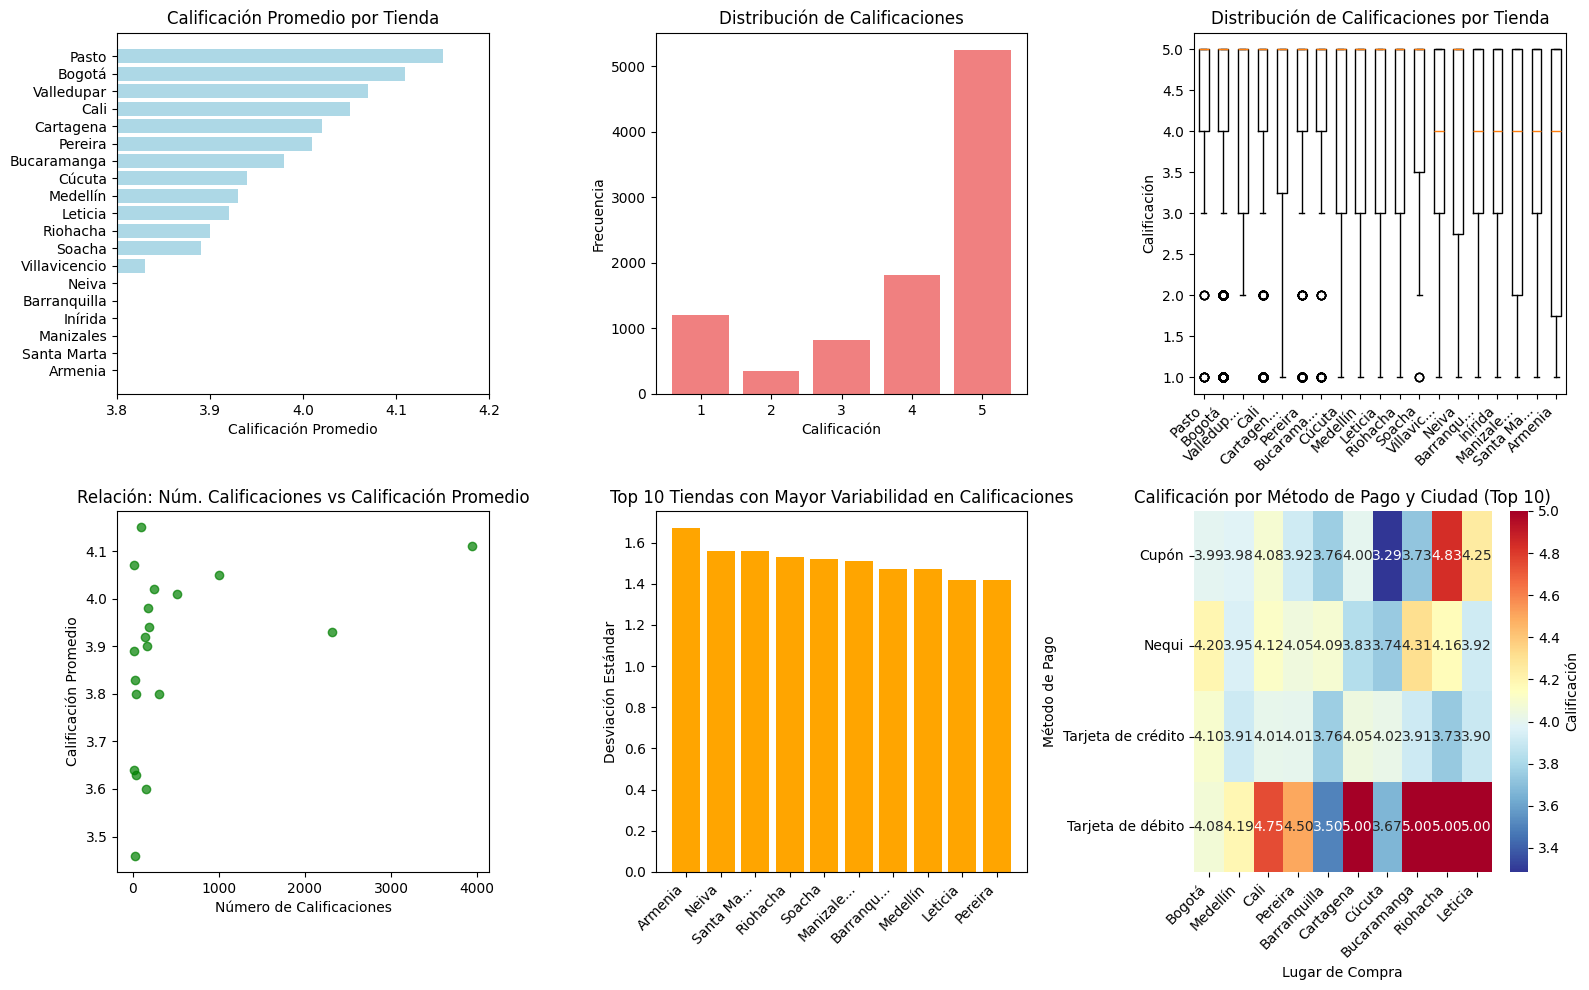

In [8]:
# Visualizaci√≥n de calificaciones
plt.figure(figsize=(16, 10))

# Calificaci√≥n promedio por tienda
plt.subplot(2, 3, 1)
plt.barh(range(len(calificaciones_tienda)), calificaciones_tienda['Calificaci√≥n Promedio'], color='lightblue')
plt.yticks(range(len(calificaciones_tienda)), calificaciones_tienda.index)
plt.xlabel('Calificaci√≥n Promedio')
plt.title('Calificaci√≥n Promedio por Tienda')
plt.xlim(3.8, 4.2)
plt.gca().invert_yaxis()

# Distribuci√≥n de calificaciones general
plt.subplot(2, 3, 2)
calificaciones_counts = todos_datos['Calificaci√≥n'].value_counts().sort_index()
plt.bar(calificaciones_counts.index, calificaciones_counts.values, color='lightcoral')
plt.xlabel('Calificaci√≥n')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n de Calificaciones')
plt.xticks([1, 2, 3, 4, 5])

# Box plot de calificaciones por tienda (todas las tiendas)
plt.subplot(2, 3, 3)
datos_para_boxplot = []
etiquetas_tiendas = []
for tienda in calificaciones_tienda.index:
    datos_tienda = todos_datos[todos_datos['Lugar de Compra'] == tienda]['Calificaci√≥n']
    datos_para_boxplot.append(datos_tienda)
    etiquetas_tiendas.append(tienda[:8] + '...' if len(tienda) > 8 else tienda)

plt.boxplot(datos_para_boxplot, labels=etiquetas_tiendas)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Calificaci√≥n')
plt.title('Distribuci√≥n de Calificaciones por Tienda')

# Relaci√≥n entre n√∫mero de calificaciones y calificaci√≥n promedio
plt.subplot(2, 3, 4)
plt.scatter(calificaciones_tienda['N√∫mero de Calificaciones'], 
           calificaciones_tienda['Calificaci√≥n Promedio'], alpha=0.7, color='green')
plt.xlabel('N√∫mero de Calificaciones')
plt.ylabel('Calificaci√≥n Promedio')
plt.title('Relaci√≥n: N√∫m. Calificaciones vs Calificaci√≥n Promedio')

# Desviaci√≥n est√°ndar por tienda
plt.subplot(2, 3, 5)
top_10_desv = calificaciones_tienda.sort_values('Desviaci√≥n Est√°ndar', ascending=False).head(10)
plt.bar(range(len(top_10_desv)), top_10_desv['Desviaci√≥n Est√°ndar'], color='orange')
plt.xticks(range(len(top_10_desv)), [t[:8] + '...' if len(t) > 8 else t for t in top_10_desv.index], rotation=45, ha='right')
plt.ylabel('Desviaci√≥n Est√°ndar')
plt.title('Top 10 Tiendas con Mayor Variabilidad en Calificaciones')

# Heatmap de calificaciones por m√©todo de pago y lugar
plt.subplot(2, 3, 6)
pivot_calif = todos_datos.pivot_table(values='Calificaci√≥n', 
                                     index='M√©todo de pago', 
                                     columns='Lugar de Compra', 
                                     aggfunc='mean')
# Seleccionar solo las top 10 ciudades por facturaci√≥n para el heatmap
top_ciudades = facturacion_por_tienda.head(10).index
pivot_calif_top = pivot_calif[top_ciudades]
sns.heatmap(pivot_calif_top, annot=True, cmap='RdYlBu_r', fmt='.2f', cbar_kws={'label': 'Calificaci√≥n'})
plt.title('Calificaci√≥n por M√©todo de Pago y Ciudad (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('M√©todo de Pago')

plt.tight_layout()
plt.show()

# 4. Productos m√°s y menos vendidos

In [9]:
# 4. Productos m√°s y menos vendidos
print("=== AN√ÅLISIS DE PRODUCTOS M√ÅS Y MENOS VENDIDOS ===\n")

# An√°lisis por producto individual
productos_vendidos = todos_datos.groupby('Producto').agg({
    'Precio': ['sum', 'mean', 'count'],
    'Calificaci√≥n': 'mean'
}).round(2)

# Simplificar nombres de columnas
productos_vendidos.columns = ['Facturaci√≥n Total', 'Precio Promedio', 'Cantidad Vendida', 'Calificaci√≥n Promedio']
productos_vendidos = productos_vendidos.sort_values('Cantidad Vendida', ascending=False)

print(f"1. Total de productos √∫nicos: {len(productos_vendidos)}")

print(f"\n2. Top 15 productos m√°s vendidos:")
top_15_productos = productos_vendidos.head(15)
for i, (producto, datos) in enumerate(top_15_productos.iterrows(), 1):
    print(f"   {i:2}. {producto[:50]:<50} - {datos['Cantidad Vendida']} unidades (${datos['Facturaci√≥n Total']:,.0f})")

print(f"\n3. Top 15 productos menos vendidos:")
bottom_15_productos = productos_vendidos.tail(15).sort_values('Cantidad Vendida', ascending=True)
for i, (producto, datos) in enumerate(bottom_15_productos.iterrows(), 1):
    print(f"   {i:2}. {producto[:50]:<50} - {datos['Cantidad Vendida']} unidades (${datos['Facturaci√≥n Total']:,.0f})")

# Productos por facturaci√≥n
print(f"\n4. Top 10 productos por facturaci√≥n:")
top_10_facturacion = productos_vendidos.sort_values('Facturaci√≥n Total', ascending=False).head(10)
for i, (producto, datos) in enumerate(top_10_facturacion.iterrows(), 1):
    print(f"   {i:2}. {producto[:40]:<40} - ${datos['Facturaci√≥n Total']:,.0f} ({datos['Cantidad Vendida']} unidades)")

=== AN√ÅLISIS DE PRODUCTOS M√ÅS Y MENOS VENDIDOS ===

1. Total de productos √∫nicos: 51

2. Top 15 productos m√°s vendidos:
    1. Mesa de noche                                      - 210.0 unidades ($58,419,500)
    2. Microondas                                         - 206.0 unidades ($115,699,500)
    3. Carrito de control remoto                          - 206.0 unidades ($14,767,700)
    4. Bater√≠a                                            - 203.0 unidades ($147,806,300)
    5. Cama king                                          - 201.0 unidades ($135,780,400)
    6. Modelado predictivo                                - 200.0 unidades ($12,616,100)
    7. Secadora de ropa                                   - 200.0 unidades ($210,238,000)
    8. Set de ollas                                       - 200.0 unidades ($30,506,400)
    9. Cama box                                           - 199.0 unidades ($104,097,800)
   10. Bloques de construcci√≥n                            - 199.0 un

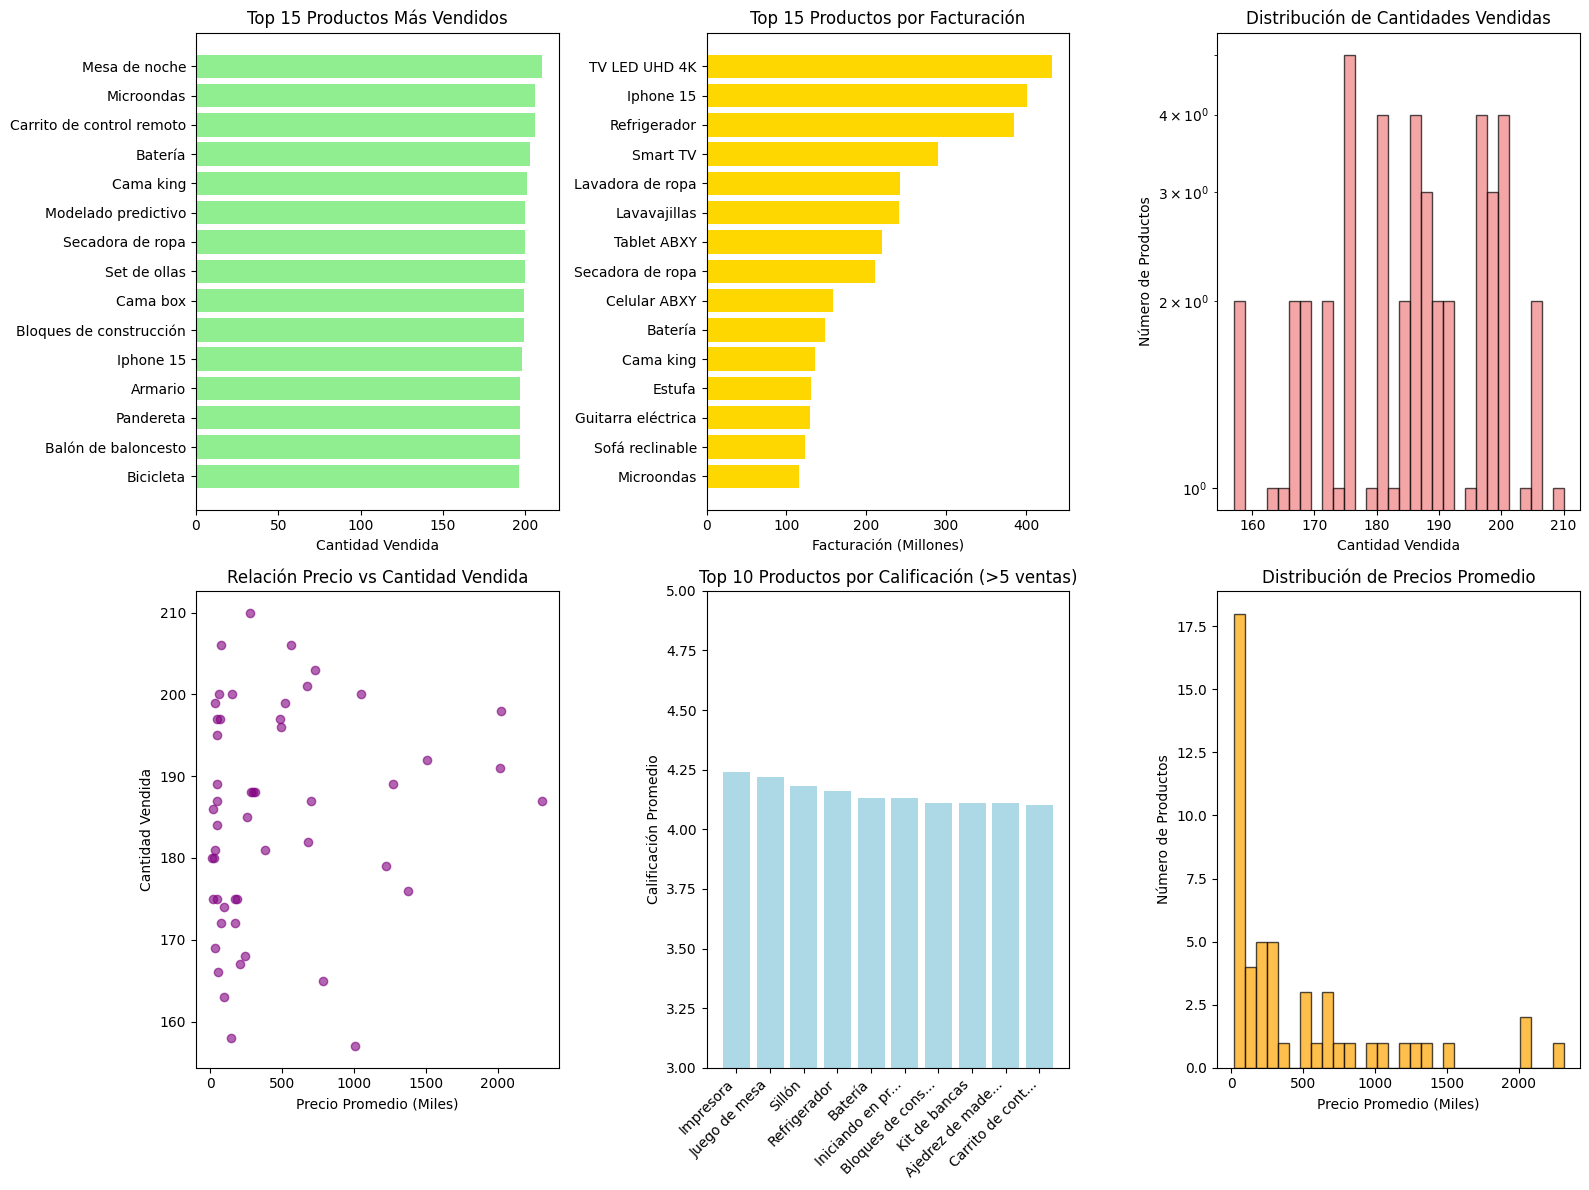


=== ESTAD√çSTICAS ADICIONALES DE PRODUCTOS ===
‚Ä¢ Producto m√°s vendido: Mesa de noche (210.0 unidades)
‚Ä¢ Producto menos vendido: Celular ABXY (157.0 unidades)
‚Ä¢ Promedio de ventas por producto: 185.0 unidades
‚Ä¢ Mediana de ventas por producto: 187.0 unidades
‚Ä¢ Productos con solo 1 venta: 0 (0.0%)
‚Ä¢ Productos con m√°s de 10 ventas: 51 (100.0%)


In [10]:
# Visualizaci√≥n de productos m√°s y menos vendidos
plt.figure(figsize=(16, 12))

# Top 15 productos m√°s vendidos
plt.subplot(2, 3, 1)
top_15_productos = productos_vendidos.head(15)
plt.barh(range(len(top_15_productos)), top_15_productos['Cantidad Vendida'], color='lightgreen')
plt.yticks(range(len(top_15_productos)), [p[:30] + '...' if len(p) > 30 else p for p in top_15_productos.index])
plt.xlabel('Cantidad Vendida')
plt.title('Top 15 Productos M√°s Vendidos')
plt.gca().invert_yaxis()

# Top 15 productos por facturaci√≥n
plt.subplot(2, 3, 2)
top_15_facturacion = productos_vendidos.sort_values('Facturaci√≥n Total', ascending=False).head(15)
plt.barh(range(len(top_15_facturacion)), top_15_facturacion['Facturaci√≥n Total'] / 1e6, color='gold')
plt.yticks(range(len(top_15_facturacion)), [p[:30] + '...' if len(p) > 30 else p for p in top_15_facturacion.index])
plt.xlabel('Facturaci√≥n (Millones)')
plt.title('Top 15 Productos por Facturaci√≥n')
plt.gca().invert_yaxis()

# Distribuci√≥n de cantidad vendida
plt.subplot(2, 3, 3)
plt.hist(productos_vendidos['Cantidad Vendida'], bins=30, alpha=0.7, edgecolor='black', color='lightcoral')
plt.xlabel('Cantidad Vendida')
plt.ylabel('N√∫mero de Productos')
plt.title('Distribuci√≥n de Cantidades Vendidas')
plt.yscale('log')

# Relaci√≥n precio vs cantidad vendida
plt.subplot(2, 3, 4)
plt.scatter(productos_vendidos['Precio Promedio'] / 1000, productos_vendidos['Cantidad Vendida'], alpha=0.6, color='purple')
plt.xlabel('Precio Promedio (Miles)')
plt.ylabel('Cantidad Vendida')
plt.title('Relaci√≥n Precio vs Cantidad Vendida')

# Top productos por calificaci√≥n (solo los que tienen m√°s de 5 ventas)
plt.subplot(2, 3, 5)
productos_con_ventas = productos_vendidos[productos_vendidos['Cantidad Vendida'] >= 5]
top_10_calif_prod = productos_con_ventas.sort_values('Calificaci√≥n Promedio', ascending=False).head(10)
plt.bar(range(len(top_10_calif_prod)), top_10_calif_prod['Calificaci√≥n Promedio'], color='lightblue')
plt.xticks(range(len(top_10_calif_prod)), [p[:15] + '...' if len(p) > 15 else p for p in top_10_calif_prod.index], rotation=45, ha='right')
plt.ylabel('Calificaci√≥n Promedio')
plt.title('Top 10 Productos por Calificaci√≥n (>5 ventas)')
plt.ylim(3, 5)

# Distribuci√≥n de precios promedio de productos
plt.subplot(2, 3, 6)
plt.hist(productos_vendidos['Precio Promedio'] / 1000, bins=30, alpha=0.7, edgecolor='black', color='orange')
plt.xlabel('Precio Promedio (Miles)')
plt.ylabel('N√∫mero de Productos')
plt.title('Distribuci√≥n de Precios Promedio')

plt.tight_layout()
plt.show()

# Estad√≠sticas adicionales
print("\n=== ESTAD√çSTICAS ADICIONALES DE PRODUCTOS ===")
print(f"‚Ä¢ Producto m√°s vendido: {productos_vendidos.iloc[0].name} ({productos_vendidos.iloc[0]['Cantidad Vendida']} unidades)")
print(f"‚Ä¢ Producto menos vendido: {productos_vendidos.iloc[-1].name} ({productos_vendidos.iloc[-1]['Cantidad Vendida']} unidades)")
print(f"‚Ä¢ Promedio de ventas por producto: {productos_vendidos['Cantidad Vendida'].mean():.1f} unidades")
print(f"‚Ä¢ Mediana de ventas por producto: {productos_vendidos['Cantidad Vendida'].median():.1f} unidades")
print(f"‚Ä¢ Productos con solo 1 venta: {len(productos_vendidos[productos_vendidos['Cantidad Vendida'] == 1])} ({len(productos_vendidos[productos_vendidos['Cantidad Vendida'] == 1])/len(productos_vendidos)*100:.1f}%)")
print(f"‚Ä¢ Productos con m√°s de 10 ventas: {len(productos_vendidos[productos_vendidos['Cantidad Vendida'] > 10])} ({len(productos_vendidos[productos_vendidos['Cantidad Vendida'] > 10])/len(productos_vendidos)*100:.1f}%)")

# 5. Env√≠o promedio por tienda

In [11]:
# 5. Env√≠o promedio por tienda
print("=== AN√ÅLISIS DE COSTOS DE ENV√çO POR TIENDA ===\n")

# An√°lisis de costos de env√≠o por tienda
envios_por_tienda = todos_datos.groupby('Lugar de Compra').agg({
    'Costo de env√≠o': ['mean', 'std', 'min', 'max', 'sum'],
    'Precio': 'count'
}).round(2)

# Simplificar nombres de columnas
envios_por_tienda.columns = ['Env√≠o Promedio', 'Desviaci√≥n Est√°ndar', 'Env√≠o M√≠nimo', 'Env√≠o M√°ximo', 'Costo Total Env√≠os', 'N√∫mero de Env√≠os']
envios_por_tienda = envios_por_tienda.sort_values('Env√≠o Promedio', ascending=False)

print("1. Costos de env√≠o por tienda:")
print(envios_por_tienda)

# Estad√≠sticas generales de env√≠os
print(f"\n2. Estad√≠sticas generales de env√≠os:")
print(f"   ‚Ä¢ Costo de env√≠o promedio general: ${todos_datos['Costo de env√≠o'].mean():.2f}")
print(f"   ‚Ä¢ Costo de env√≠o mediano: ${todos_datos['Costo de env√≠o'].median():.2f}")
print(f"   ‚Ä¢ Costo de env√≠o m√≠nimo: ${todos_datos['Costo de env√≠o'].min():.2f}")
print(f"   ‚Ä¢ Costo de env√≠o m√°ximo: ${todos_datos['Costo de env√≠o'].max():.2f}")
print(f"   ‚Ä¢ Total gastado en env√≠os: ${todos_datos['Costo de env√≠o'].sum():,.2f}")
print(f"   ‚Ä¢ Desviaci√≥n est√°ndar: ${todos_datos['Costo de env√≠o'].std():.2f}")

# Porcentaje del costo de env√≠o respecto al precio del producto
todos_datos['Porcentaje_Envio'] = (todos_datos['Costo de env√≠o'] / todos_datos['Precio'] * 100).round(2)

print(f"\n3. Impacto del env√≠o en el precio total:")
print(f"   ‚Ä¢ Porcentaje promedio de env√≠o respecto al precio: {todos_datos['Porcentaje_Envio'].mean():.2f}%")
print(f"   ‚Ä¢ Porcentaje mediano de env√≠o respecto al precio: {todos_datos['Porcentaje_Envio'].median():.2f}%")

# Top y bottom tiendas por costo de env√≠o
print(f"\n4. Top 5 tiendas con env√≠o m√°s caro:")
top_5_envio = envios_por_tienda.head(5)
for i, (tienda, datos) in enumerate(top_5_envio.iterrows(), 1):
    print(f"   {i}. {tienda}: ${datos['Env√≠o Promedio']:.2f} ({datos['N√∫mero de Env√≠os']} env√≠os)")

print(f"\n5. Top 5 tiendas con env√≠o m√°s barato:")
bottom_5_envio = envios_por_tienda.tail(5)
for i, (tienda, datos) in enumerate(bottom_5_envio.iterrows(), 1):
    print(f"   {i}. {tienda}: ${datos['Env√≠o Promedio']:.2f} ({datos['N√∫mero de Env√≠os']} env√≠os)")

=== AN√ÅLISIS DE COSTOS DE ENV√çO POR TIENDA ===

1. Costos de env√≠o por tienda:
                 Env√≠o Promedio  Desviaci√≥n Est√°ndar  Env√≠o M√≠nimo  \
Lugar de Compra                                                      
Soacha                 34768.42             36148.84         900.0   
In√≠rida                30557.14             37358.82           0.0   
C√∫cuta                 28597.31             36249.96           0.0   
Pasto                  27801.06             32961.48           0.0   
Neiva                  27710.00             36173.37           0.0   
Bucaramanga            26790.06             33507.63           0.0   
Cali                   26726.81             31769.69           0.0   
Leticia                25317.61             30561.62           0.0   
Medell√≠n               25282.02             32092.56           0.0   
Villavicencio          25100.00             27609.72           0.0   
Manizales              24948.78             29870.66           0.0   


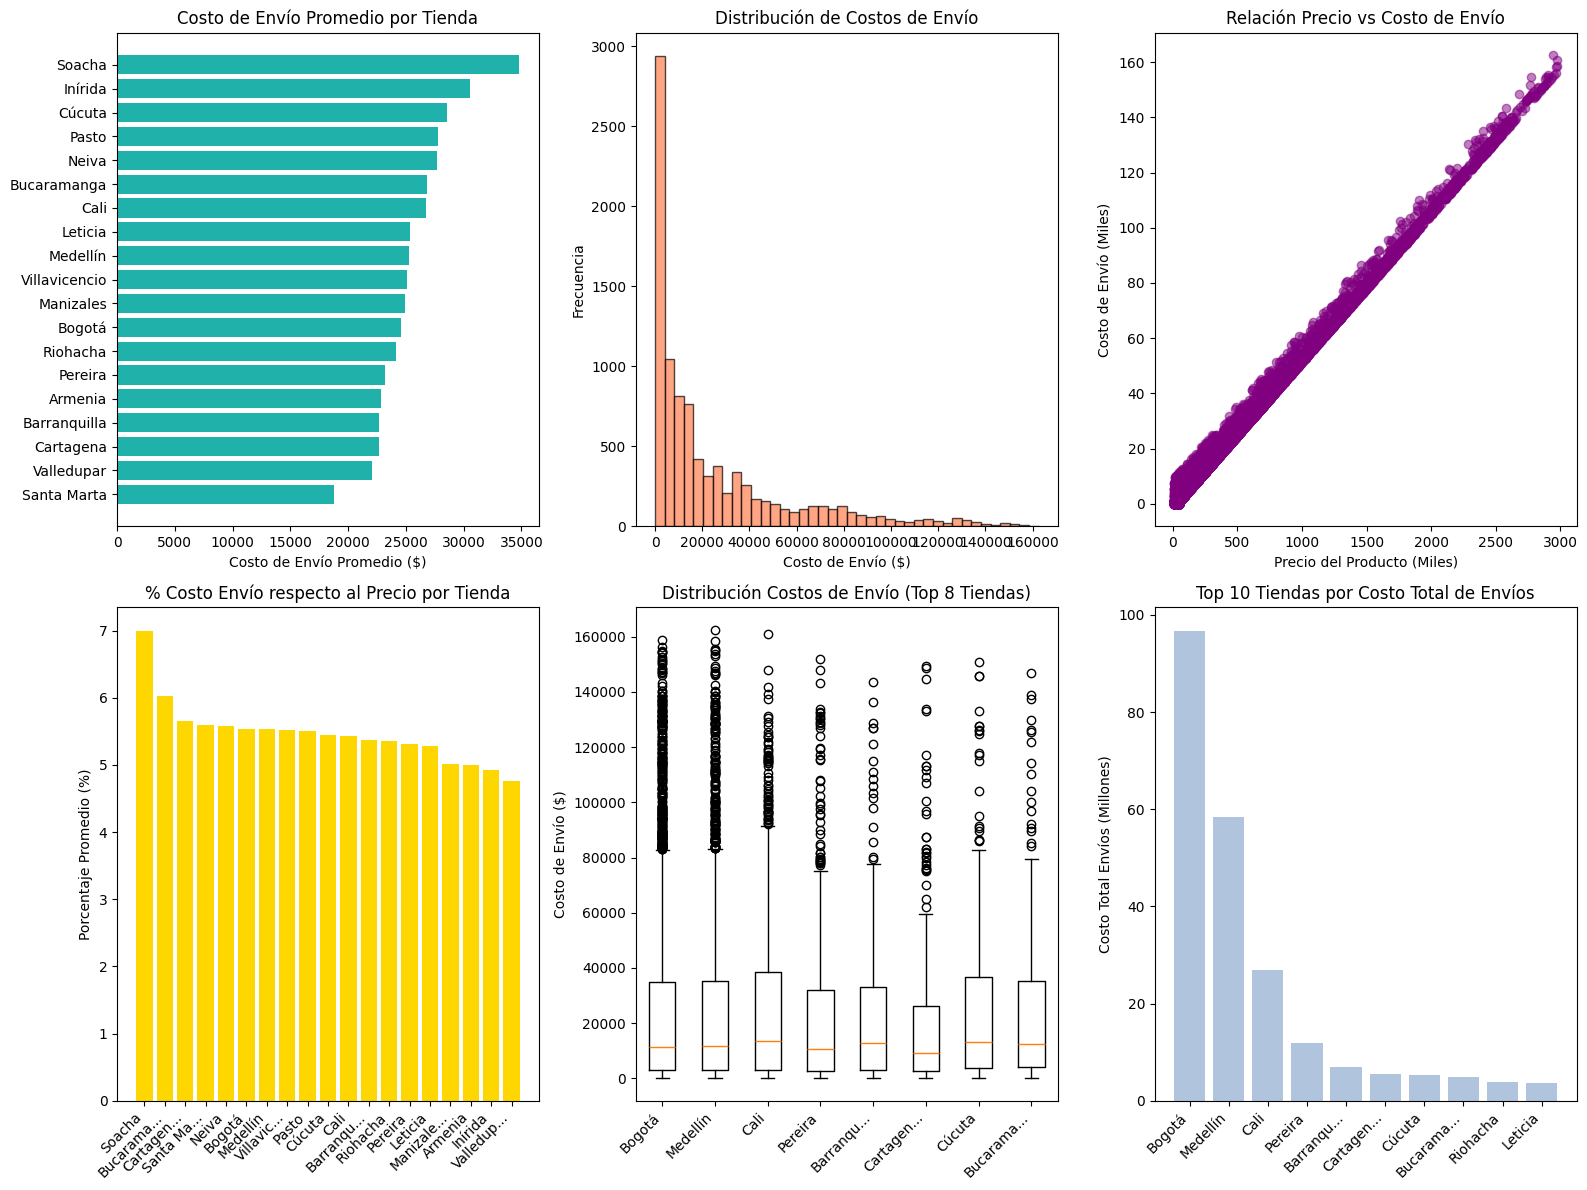


                        RESUMEN EJECUTIVO - ALURA STORE LATAM
üìä DATOS ANALIZADOS:
   ‚Ä¢ Total de registros: 9,435
   ‚Ä¢ N√∫mero de tiendas: 19
   ‚Ä¢ N√∫mero de productos √∫nicos: 51
   ‚Ä¢ N√∫mero de categor√≠as: 8

üí∞ FACTURACI√ìN:
   ‚Ä¢ Facturaci√≥n total: $4,403,619,200
   ‚Ä¢ Tienda con mayor facturaci√≥n: Bogot√° ($1,814,858,300)
   ‚Ä¢ Categor√≠a m√°s rentable: Electr√≥nicos ($1,660,576,500)

‚≠ê CALIFICACIONES:
   ‚Ä¢ Calificaci√≥n promedio general: 4.01/5.0
   ‚Ä¢ Tienda mejor calificada: Pasto (4.15/5.0)

üì¶ PRODUCTOS:
   ‚Ä¢ Producto m√°s vendido: Mesa de noche (210 unidades)
   ‚Ä¢ Promedio de ventas por producto: 185 unidades

üöö ENV√çOS:
   ‚Ä¢ Costo promedio de env√≠o: $24,875.15
   ‚Ä¢ Costo total en env√≠os: $234,697,000
   ‚Ä¢ Tienda con env√≠o m√°s caro: Soacha ($34,768.42)
   ‚Ä¢ Tienda con env√≠o m√°s barato: Santa Marta ($18,752.32)


In [12]:
# Visualizaci√≥n de costos de env√≠o
plt.figure(figsize=(16, 12))

# Costo de env√≠o promedio por tienda
plt.subplot(2, 3, 1)
plt.barh(range(len(envios_por_tienda)), envios_por_tienda['Env√≠o Promedio'], color='lightseagreen')
plt.yticks(range(len(envios_por_tienda)), envios_por_tienda.index)
plt.xlabel('Costo de Env√≠o Promedio ($)')
plt.title('Costo de Env√≠o Promedio por Tienda')
plt.gca().invert_yaxis()

# Distribuci√≥n de costos de env√≠o
plt.subplot(2, 3, 2)
plt.hist(todos_datos['Costo de env√≠o'], bins=40, alpha=0.7, edgecolor='black', color='coral')
plt.xlabel('Costo de Env√≠o ($)')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n de Costos de Env√≠o')

# Relaci√≥n entre precio del producto y costo de env√≠o
plt.subplot(2, 3, 3)
plt.scatter(todos_datos['Precio'] / 1000, todos_datos['Costo de env√≠o'] / 1000, alpha=0.5, color='purple')
plt.xlabel('Precio del Producto (Miles)')
plt.ylabel('Costo de Env√≠o (Miles)')
plt.title('Relaci√≥n Precio vs Costo de Env√≠o')

# Porcentaje de env√≠o respecto al precio por tienda
plt.subplot(2, 3, 4)
porcentaje_por_tienda = todos_datos.groupby('Lugar de Compra')['Porcentaje_Envio'].mean().sort_values(ascending=False)
plt.bar(range(len(porcentaje_por_tienda)), porcentaje_por_tienda.values, color='gold')
plt.xticks(range(len(porcentaje_por_tienda)), [t[:8] + '...' if len(t) > 8 else t for t in porcentaje_por_tienda.index], rotation=45, ha='right')
plt.ylabel('Porcentaje Promedio (%)')
plt.title('% Costo Env√≠o respecto al Precio por Tienda')

# Box plot de costos de env√≠o por las principales tiendas
plt.subplot(2, 3, 5)
principales_tiendas = facturacion_por_tienda.head(8).index
datos_envio_principales = []
etiquetas_principales = []
for tienda in principales_tiendas:
    datos_tienda = todos_datos[todos_datos['Lugar de Compra'] == tienda]['Costo de env√≠o']
    datos_envio_principales.append(datos_tienda)
    etiquetas_principales.append(tienda[:8] + '...' if len(tienda) > 8 else tienda)

plt.boxplot(datos_envio_principales, tick_labels=etiquetas_principales)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Costo de Env√≠o ($)')
plt.title('Distribuci√≥n Costos de Env√≠o (Top 8 Tiendas)')

# Costo total de env√≠os por tienda
plt.subplot(2, 3, 6)
top_10_costo_total = envios_por_tienda.sort_values('Costo Total Env√≠os', ascending=False).head(10)
plt.bar(range(len(top_10_costo_total)), top_10_costo_total['Costo Total Env√≠os'] / 1e6, color='lightsteelblue')
plt.xticks(range(len(top_10_costo_total)), [t[:8] + '...' if len(t) > 8 else t for t in top_10_costo_total.index], rotation=45, ha='right')
plt.ylabel('Costo Total Env√≠os (Millones)')
plt.title('Top 10 Tiendas por Costo Total de Env√≠os')

plt.tight_layout()
plt.show()

# RESUMEN FINAL DEL AN√ÅLISIS
print("\n" + "="*80)
print("                        RESUMEN EJECUTIVO - ALURA STORE LATAM")
print("="*80)
print(f"üìä DATOS ANALIZADOS:")
print(f"   ‚Ä¢ Total de registros: {len(todos_datos):,}")
print(f"   ‚Ä¢ N√∫mero de tiendas: {todos_datos['Lugar de Compra'].nunique()}")
print(f"   ‚Ä¢ N√∫mero de productos √∫nicos: {todos_datos['Producto'].nunique()}")
print(f"   ‚Ä¢ N√∫mero de categor√≠as: {todos_datos['Categor√≠a del Producto'].nunique()}")

print(f"\nüí∞ FACTURACI√ìN:")
print(f"   ‚Ä¢ Facturaci√≥n total: ${todos_datos['Precio'].sum():,.0f}")
print(f"   ‚Ä¢ Tienda con mayor facturaci√≥n: {facturacion_por_tienda.index[0]} (${facturacion_por_tienda.iloc[0]['Facturaci√≥n Total']:,.0f})")
print(f"   ‚Ä¢ Categor√≠a m√°s rentable: {ventas_por_categoria.index[0]} (${ventas_por_categoria.iloc[0]['Facturaci√≥n Total']:,.0f})")

print(f"\n‚≠ê CALIFICACIONES:")
print(f"   ‚Ä¢ Calificaci√≥n promedio general: {todos_datos['Calificaci√≥n'].mean():.2f}/5.0")
print(f"   ‚Ä¢ Tienda mejor calificada: {calificaciones_tienda.index[0]} ({calificaciones_tienda.iloc[0]['Calificaci√≥n Promedio']:.2f}/5.0)")

print(f"\nüì¶ PRODUCTOS:")
print(f"   ‚Ä¢ Producto m√°s vendido: {productos_vendidos.index[0]} ({productos_vendidos.iloc[0]['Cantidad Vendida']:.0f} unidades)")
print(f"   ‚Ä¢ Promedio de ventas por producto: {productos_vendidos['Cantidad Vendida'].mean():.0f} unidades")

print(f"\nüöö ENV√çOS:")
print(f"   ‚Ä¢ Costo promedio de env√≠o: ${todos_datos['Costo de env√≠o'].mean():,.2f}")
print(f"   ‚Ä¢ Costo total en env√≠os: ${todos_datos['Costo de env√≠o'].sum():,.0f}")
print(f"   ‚Ä¢ Tienda con env√≠o m√°s caro: {envios_por_tienda.index[0]} (${envios_por_tienda.iloc[0]['Env√≠o Promedio']:,.2f})")
print(f"   ‚Ä¢ Tienda con env√≠o m√°s barato: {envios_por_tienda.index[-1]} (${envios_por_tienda.iloc[-1]['Env√≠o Promedio']:,.2f})")
print("="*80)